This file can show the results of the LHS results. However, I think a file created using (4) is maybe better

In [2]:
import pandas as pd

# Define the folder path and file names
folder_name = "results"
date = "2025-06-03_07-49"  # Replace with the exact date if needed

# Load the experiments DataFrame
experiments = pd.read_csv(f"{folder_name}/experiments_{date}.csv")

# Load the outcomes DataFrame
outcomes = pd.read_csv(f"{folder_name}/outcomes_{date}.csv")

print("DataFrames recreated from stored CSV files.")

DataFrames recreated from stored CSV files.


In [3]:
# only works because we have scalar outcomes
df=pd.DataFrame(outcomes)
df = df.groupby(outcomes.index // 3).sum()
df['Total Deaths']=df['A.1_Expected Number of Deaths']+df['A.2_Expected Number of Deaths']+df['A.3_Expected Number of Deaths']+df['A.4_Expected Number of Deaths']+df['A.5_Expected Number of Deaths']


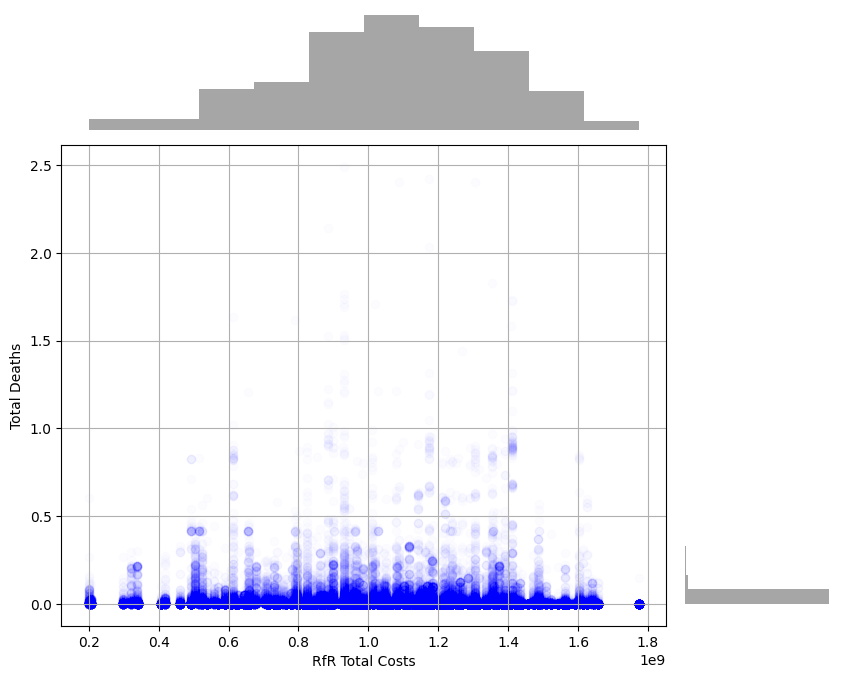

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure with a custom layout
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.05, wspace=0.05)

# Scatter plot
ax_scatter = fig.add_subplot(gs[1, 0])
ax_scatter.scatter(df['RfR Total Costs'], df['Total Deaths'], c='blue', alpha=0.01)
ax_scatter.set_xlabel('RfR Total Costs')
ax_scatter.set_ylabel('Total Deaths')
ax_scatter.grid(True)

# Histogram for RfR Total Costs
ax_hist_x = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_hist_x.hist(df['RfR Total Costs'], bins=10, color='gray', alpha=0.7)
ax_hist_x.axis('off')  # Hide axis labels for better aesthetics

# Histogram for Total Deaths
ax_hist_y = fig.add_subplot(gs[1, 1], sharey=ax_scatter)
ax_hist_y.hist(df['Total Deaths'], bins=30, orientation='horizontal', color='gray', alpha=0.7)
ax_hist_y.axis('off')  # Hide axis labels for better aesthetics

plt.show()

In [5]:
x = experiments
x_uncertainties = x.iloc[:, 0:19]
# This stops an error, but not sure whether it is a good idea.
x_uncertainties = x_uncertainties.astype(float)
x_levers = x.iloc[:, 19:-3]

# y = numeric outcome values
threshold_value = 0.01
best_cases = df['Total Deaths']<threshold_value

In [6]:
x_uncertainties

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,82.0,89.841546,1.0,0.690382,297.217503,1.5,0.705795,57.096481,1.5,0.285399,167.804184,10.0,0.374552,139.798001,1.0,0.481874,1.5,4.5,2.5
1,19.0,277.603379,1.0,0.959486,101.859587,1.5,0.073002,180.108834,1.5,0.518908,198.192229,1.0,0.285550,230.940740,1.0,0.874972,2.5,3.5,4.5
2,92.0,175.466647,1.5,0.047106,218.213586,1.5,0.933817,209.195867,1.5,0.385436,44.478054,1.5,0.567556,62.699841,10.0,0.678817,1.5,2.5,1.5
3,109.0,72.393855,10.0,0.807048,184.460248,1.0,0.077451,310.197105,1.5,0.911822,303.924010,1.0,0.309525,99.389454,1.0,0.038286,2.5,2.5,1.5
4,92.0,133.736663,1.0,0.235384,310.918767,1.5,0.475087,195.261421,1.5,0.108394,262.162627,1.0,0.829576,268.774912,10.0,0.112228,3.5,4.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,105.0,115.457737,10.0,0.109904,73.845239,1.0,0.415003,88.001391,1.0,0.208272,264.801785,10.0,0.241356,79.408502,10.0,0.708732,2.5,3.5,4.5
119996,41.0,80.190244,1.0,0.019984,75.684972,10.0,0.331461,198.006848,1.0,0.337196,157.844511,1.5,0.028583,324.105658,1.0,0.854276,1.5,4.5,2.5
119997,103.0,307.233700,1.5,0.674611,69.828817,1.5,0.391528,170.497739,10.0,0.982972,190.936488,1.0,0.312087,172.624826,10.0,0.824396,1.5,2.5,4.5
119998,55.0,260.706625,1.0,0.638466,32.823956,1.5,0.140102,263.195015,10.0,0.493947,86.113807,10.0,0.167923,55.544043,1.5,0.327462,1.5,2.5,2.5


In the following Prim_alg, you can change x to x_uncertainties or x_levers. So that you can see which have the biggest effects. 

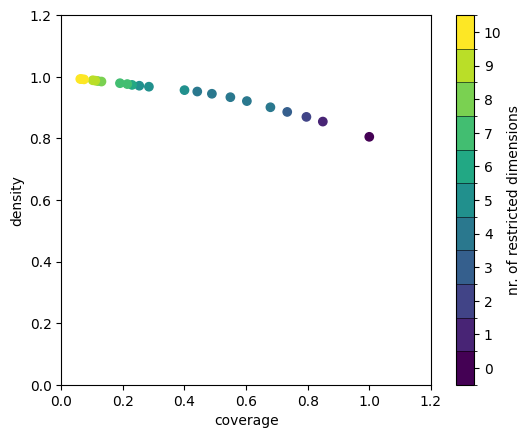

In [7]:
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
from ema_workbench.analysis import pairs_plotting


# initialize PRIM
prim_alg = prim.Prim(x_levers, best_cases, threshold=0.8, peel_alpha=0.1)

# search for box
box= prim_alg.find_box()

# show trade-offs between coverage and density
box.show_tradeoff()
plt.show()


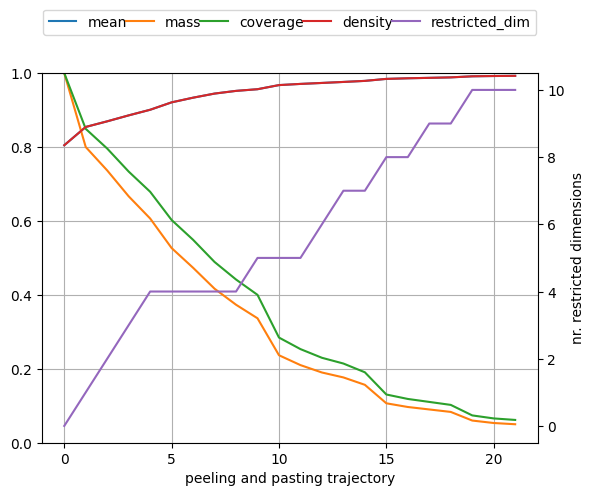

In [8]:
box.show_ppt()
plt.show()


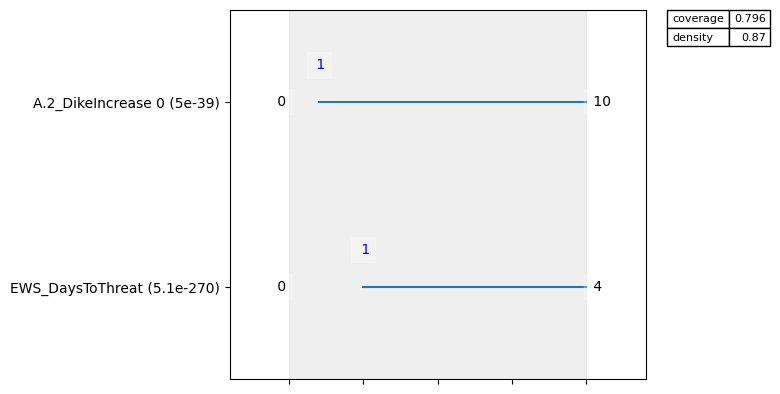

In [9]:
point = 2
box.inspect(point, style='graph')
plt.show()

Same here change x to x_levers or x_uncertainties

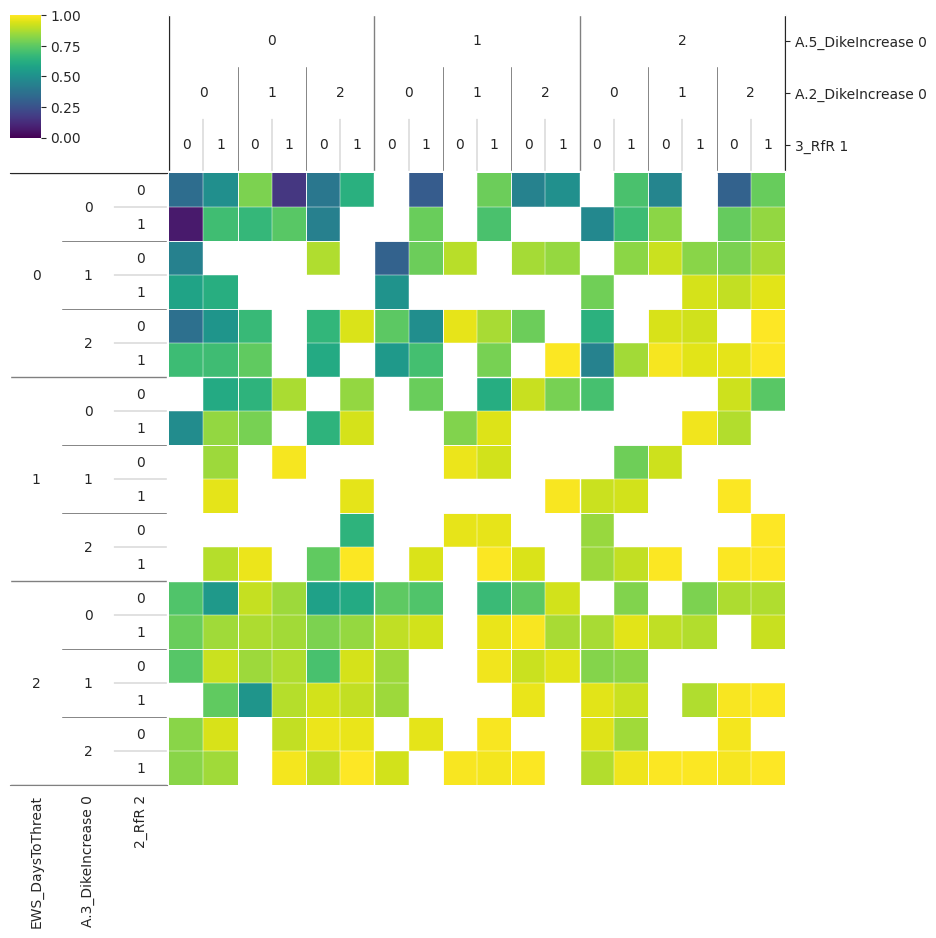

In [41]:
from ema_workbench.analysis import dimensional_stacking
best_cases_array=best_cases.to_numpy()
dimensional_stacking.create_pivot_plot(x_levers, best_cases_array)
plt.show()

